# Modul 9 - Machine Learning
Data Fellowship Batch 6
<br>
Pre-training Period


Ade Nur Istiqomah

# 1. Load the data

In [2]:
df = pd.read_csv(r'C:\Users\Ade Nur H\Documents\IYKRA Data Fellowship\Material\09 Machine Learning\Practice Case\ML_2_Fellow.csv', encoding = 'ISO-8859-1')
df.head()

<IPython.core.display.Javascript object>

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom


# 2. Perform data pre-processing

Check the data information.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Kode_Bayar         541909 non-null  object 
 1   Kode_Barang        535874 non-null  object 
 2   Barang             534420 non-null  object 
 3   Jumlah             535874 non-null  float64
 4   Tanggal_Transaksi  535874 non-null  object 
 5   Harga_Satuan       535874 non-null  float64
 6   Kode_Pelanggan     403182 non-null  float64
 7   Negara             535874 non-null  object 
dtypes: float64(3), object(5)
memory usage: 33.1+ MB


Let's see if the data has any missing values.

In [5]:
df.isnull().values.any()

True

Yes, the data has some missing values.

In [6]:
#New dataframe with rows that posess missing values.
df_miss = df[df.isna().any(axis=1)]
df_miss.head()

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
109,"536381,82567,""AIRLINE LOUNGE,METAL SIGN"",2,12/...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
253,"536394,21506,""FANCY FONT BIRTHDAY CARD, "",24,1...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
622,536414,22139,NaN,56.0,12/1/2010 11:52,0.0,NaN,United Kingdom
871,"536477,22041,""RECORD FRAME 7"""" SINGLE SIZE "",4...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
956,"536520,22760,""TRAY, BREAKFAST IN BED"",1,12/1/2...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's drop rows that has missing values. We will come back later to perform better missing data handling, if there is still time.

In [8]:
df = df.dropna()
df.head()

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 403182 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Kode_Bayar         403182 non-null  object 
 1   Kode_Barang        403182 non-null  object 
 2   Barang             403182 non-null  object 
 3   Jumlah             403182 non-null  float64
 4   Tanggal_Transaksi  403182 non-null  object 
 5   Harga_Satuan       403182 non-null  float64
 6   Kode_Pelanggan     403182 non-null  float64
 7   Negara             403182 non-null  object 
dtypes: float64(3), object(5)
memory usage: 27.7+ MB


Let's see the data stats.

In [10]:
df.describe()

,Jumlah,Harga_Satuan,Kode_Pelanggan
count,403182.000000,403182.000000,403182.000000
mean,12.036862,3.475407,15287.687868
std,172.756795,69.627365,1714.009551
min,-74215.000000,0.000000,12346.000000
25%,2.000000,1.250000,13952.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,74215.000000,38970.000000,18287.000000


There are records with negative Jumlah. We will drop this column.

In [12]:
df = df[df['Jumlah'] > 0]

There are items with lowercase and capitalized Barang. We will drop this record.

In [15]:
df = df[df['Barang'].str.isupper()].reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392691 entries, 0 to 392690
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Kode_Bayar         392691 non-null  object 
 1   Kode_Barang        392691 non-null  object 
 2   Barang             392691 non-null  object 
 3   Jumlah             392691 non-null  float64
 4   Tanggal_Transaksi  392691 non-null  object 
 5   Harga_Satuan       392691 non-null  float64
 6   Kode_Pelanggan     392691 non-null  float64
 7   Negara             392691 non-null  object 
dtypes: float64(3), object(5)
memory usage: 24.0+ MB


In addition, there are records with Harga_Satuan = 0. We drop this record.

In [17]:
df = df[df['Harga_Satuan'] > 0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392657 entries, 0 to 392690
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Kode_Bayar         392657 non-null  object 
 1   Kode_Barang        392657 non-null  object 
 2   Barang             392657 non-null  object 
 3   Jumlah             392657 non-null  float64
 4   Tanggal_Transaksi  392657 non-null  object 
 5   Harga_Satuan       392657 non-null  float64
 6   Kode_Pelanggan     392657 non-null  float64
 7   Negara             392657 non-null  object 
dtypes: float64(3), object(5)
memory usage: 27.0+ MB


Records with Kode_Barang start with "C", means that the items are canceled. Let's drop this record.

In [19]:
df = df[~df.Barang.str.startswith('C')]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361067 entries, 0 to 392690
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Kode_Bayar         361067 non-null  object 
 1   Kode_Barang        361067 non-null  object 
 2   Barang             361067 non-null  object 
 3   Jumlah             361067 non-null  float64
 4   Tanggal_Transaksi  361067 non-null  object 
 5   Harga_Satuan       361067 non-null  float64
 6   Kode_Pelanggan     361067 non-null  float64
 7   Negara             361067 non-null  object 
dtypes: float64(3), object(5)
memory usage: 24.8+ MB


# 3. Problem set

## No 1. What items customers buy the most and are there any items we should ignore?

Let's check how each countries doing. But first, let;s check to what countries do we export.

In [26]:
df.Negara.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Israel', 'Saudi Arabia', 'Czech Republic',
       'Canada', 'Unspecified', 'Brazil', 'USA', 'European Community',
       'Bahrain', 'Malta', 'RSA'], dtype=object)

Additional note:
    <br>
**EIRE is Ireland**
<br>
**RSA is Republic of South Africa**


There are two export destinations we shall address.
1. Unspecified, records with this entries are going to be dropped.
2. European Community, will be treated separately from Germany, France, Netherlands etc which are basically European countries.

In [31]:
df = df[df.Negara != 'Unspecified']

The most bought item is...

In [32]:
df_mostbought = df.groupby(['Barang'])['Jumlah'].agg('sum').sort_values(ascending = False).head()
df_mostbought

Barang
MEDIUM CERAMIC TOP STORAGE JAR        77916.0
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54415.0
JUMBO BAG RED RETROSPOT               46181.0
WHITE HANGING HEART T-LIGHT HOLDER    36725.0
ASSORTED COLOUR BIRD ORNAMENT         35340.0
Name: Jumlah, dtype: float64

....**MEDIUM CERAMIC TOP STORAGE JAR with 77916 items sold.**

And the items we should ignore (based on least bought item) is...

In [33]:
df_leastbought = df.groupby(['Barang'])['Jumlah'].agg('sum').sort_values(ascending = True)
df_leastbought.head(10)

Barang
MUMMY MOUSE RED GINGHAM RIBBON        1.0
PINK POLKADOT KIDS BAG                1.0
PINK CRYSTAL GUITAR PHONE CHARM       1.0
DOLPHIN WINDMILL                      1.0
AMBER BERTIE GLASS BEAD BAG CHARM     1.0
PACK 4 FLOWER/BUTTERFLY PATCHES       1.0
ORANGE FELT VASE + FLOWERS            1.0
VINTAGE BEAD PINK JEWEL STAND         1.0
DUSTY PINK CHRISTMAS TREE 30CM        1.0
EASTER CRAFT IVY WREATH WITH CHICK    1.0
Name: Jumlah, dtype: float64

Well, there are so many items that are only sold once or twice.

## No 2. What is our strategy to increase sales based on our export destination countries?

Let's see how each country is doing.

In [34]:
df.groupby(['Negara'])['Jumlah'].agg('sum').sort_values(ascending = False)

Negara
United Kingdom          3795883.0
Netherlands              179300.0
EIRE                     127273.0
Germany                  110479.0
France                   102277.0
Australia                 78322.0
Sweden                    35278.0
Switzerland               27785.0
Japan                     24805.0
Spain                     24433.0
Belgium                   21274.0
Norway                    17684.0
Portugal                  14796.0
Finland                    9186.0
Channel Islands            9021.0
Denmark                    7576.0
Italy                      6896.0
Cyprus                     5893.0
Austria                    4474.0
Singapore                  4222.0
Israel                     3872.0
Poland                     3121.0
Canada                     2566.0
Iceland                    2364.0
USA                        2305.0
Greece                     1465.0
United Arab Emirates        928.0
Malta                       787.0
Lithuania                   562.0
Czech R

Clearly, United Kingdom is an outlier. But let's focus on countries with least amount of sales.

In [35]:
df_least = df[df['Negara'].isin(['United Arab Emirates','Malta', 'Czech Republic', 'Lithuania', 'European Community', 'Lebanon', 'Brazil', 'RSA', 'Bahrain', 'Saudi Arabia'])]
df_least = df_least.reset_index(drop=True)
df_least

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
0,537081,22409,MONEY BOX BISCUITS DESIGN,12.0,12/5/2010 12:00,1.25,15332.0,Lithuania
1,537081,21915,RED HARMONICA IN BOX,36.0,12/5/2010 12:00,1.25,15332.0,Lithuania
2,537081,15056BL,EDWARDIAN PARASOL BLACK,12.0,12/5/2010 12:00,5.95,15332.0,Lithuania
3,537081,15056N,EDWARDIAN PARASOL NATURAL,12.0,12/5/2010 12:00,5.95,15332.0,Lithuania
4,537081,20679,EDWARDIAN PARASOL RED,12.0,12/5/2010 12:00,5.95,15332.0,Lithuania
...,...,...,...,...,...,...,...,...
405,576897,22796,PHOTO FRAME 3 CLASSIC HANGING,4.0,11/17/2011 8:41,9.95,17828.0,Malta
406,576897,72741,GRAND CHOCOLATECANDLE,45.0,11/17/2011 8:41,1.45,17828.0,Malta
407,576897,22306,SILVER MUG BONE CHINA TREE OF LIFE,12.0,11/17/2011 8:41,1.06,17828.0,Malta
408,576897,85034C,3 ROSE MORRIS BOXED CANDLES,24.0,11/17/2011 8:41,1.25,17828.0,Malta


In [36]:
df_mostbought_countries = df_least.set_index('Barang').groupby('Negara')['Jumlah'].nlargest(1).reset_index()
df_mostbought_countries

,Negara,Barang,Jumlah
0,Bahrain,ICE CREAM SUNDAE LIP GLOSS,96.0
1,Brazil,ROSES REGENCY TEACUP AND SAUCER,24.0
2,Czech Republic,WOODEN TREE CHRISTMAS SCANDINAVIAN,72.0
3,European Community,SET OF 60 PANTRY DESIGN CAKE CASES,24.0
4,Lebanon,ASSTD FRUIT+FLOWERS FRIDGE MAGNETS,24.0
5,Lithuania,FELTCRAFT DOLL ROSIE,48.0
6,Malta,GRAND CHOCOLATECANDLE,45.0
7,RSA,4 TRADITIONAL SPINNING TOPS,12.0
8,Saudi Arabia,ASSORTED BOTTLE TOP MAGNETS,12.0
9,United Arab Emirates,ASSORTED CHEESE FRIDGE MAGNETS,72.0


Let's digging even deeper to several countries.

In [41]:
df_Bahrain = df_least[df_least['Negara'] == 'Bahrain']
df_Bahrain.sort_values(by = 'Jumlah', ascending = False)

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
161,552449,23076,ICE CREAM SUNDAE LIP GLOSS,96.0,5/9/2011 13:49,1.25,12355.0,Bahrain
162,552449,23077,DOUGHNUT LIP GLOSS,60.0,5/9/2011 13:49,1.25,12355.0,Bahrain
160,552449,22693,GROW A FLYTRAP OR SUNFLOWER IN TIN,24.0,5/9/2011 13:49,1.25,12355.0,Bahrain
166,552449,85040A,S/4 PINK FLOWER CANDLES IN BOWL,12.0,5/9/2011 13:49,1.65,12355.0,Bahrain
164,552449,22649,STRAWBERRY FAIRY CAKE TEAPOT,8.0,5/9/2011 13:49,4.95,12355.0,Bahrain
173,553900,37446,MINI CAKE STAND WITH HANGING CAKES,8.0,5/19/2011 17:47,1.45,12353.0,Bahrain
167,552449,22699,ROSES REGENCY TEACUP AND SAUCER,6.0,5/9/2011 13:49,2.95,12355.0,Bahrain
168,552449,22697,GREEN REGENCY TEACUP AND SAUCER,6.0,5/9/2011 13:49,2.95,12355.0,Bahrain
169,552449,22698,PINK REGENCY TEACUP AND SAUCER,6.0,5/9/2011 13:49,2.95,12355.0,Bahrain
170,552449,72802A,ROSE SCENT CANDLE IN JEWELLED BOX,6.0,5/9/2011 13:49,4.25,12355.0,Bahrain


In [52]:
df_UAE = df_least[df_least['Negara'] == 'United Arab Emirates']
df_UAE.sort_values(by = 'Jumlah', ascending = False)

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
87,543911,21700,BIG DOUGHNUT FRIDGE MAGNETS,72.0,2/14/2011 12:46,0.85,17829.0,United Arab Emirates
86,543911,85215,ASSORTED CHEESE FRIDGE MAGNETS,72.0,2/14/2011 12:46,0.65,17829.0,United Arab Emirates
325,565218,22092,BLUE PAISLEY TISSUE BOX,36.0,9/1/2011 17:45,0.39,12739.0,United Arab Emirates
319,565218,22492,MINI PAINT SET VINTAGE,36.0,9/1/2011 17:45,0.65,12739.0,United Arab Emirates
315,565218,23546,WRAP PAISLEY PARK,25.0,9/1/2011 17:45,0.42,12739.0,United Arab Emirates
...,...,...,...,...,...,...,...,...
84,543911,22200,FRYING PAN PINK POLKADOT,6.0,2/14/2011 12:46,4.25,17829.0,United Arab Emirates
333,565218,22507,MEMO BOARD RETROSPOT DESIGN,4.0,9/1/2011 17:45,4.95,12739.0,United Arab Emirates
303,565218,23245,SET OF 3 REGENCY CAKE TINS,4.0,9/1/2011 17:45,4.95,12739.0,United Arab Emirates
73,543911,48138,DOORMAT UNION FLAG,2.0,2/14/2011 12:46,7.95,17829.0,United Arab Emirates


In [57]:
df_UAE[df_UAE['Kode_Pelanggan'] == 17829.0].sort_values(by = 'Jumlah', ascending = True).head(1)

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
73,543911,48138,DOORMAT UNION FLAG,2.0,2/14/2011 12:46,7.95,17829.0,United Arab Emirates


In [58]:
df_UAE[df_UAE['Kode_Pelanggan'] == 17829.0].sort_values(by = 'Jumlah', ascending = True).tail(1)

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
86,543911,85215,ASSORTED CHEESE FRIDGE MAGNETS,72.0,2/14/2011 12:46,0.65,17829.0,United Arab Emirates


Customer in UAE bought DOORMAT UNION FLAG when they bought ASSORTED CHEESE FRIDGE MAGNETS or BIG DOUGHNUT FRIDGE MAGNETS.

Generate clean dataset to csv for insight exploration in Tableau.

In [59]:
df.to_csv('clean_retail_data.csv', index = False)

## 3. Do customer segmentation appropriately. Please explain in detail and completely

First. we will do feature engineering to select which column that needs to be trained.

In [166]:
df = pd.read_csv(r'C:\Users\Ade Nur H\Documents\IYKRA Data Fellowship\Material\09 Machine Learning\Practice Case\clean_retail_data.csv', encoding = 'ISO-8859-1')
df.head()

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
3,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,22752,SET 7 BABUSHKA NESTING BOXES,2.0,12/1/2010 8:26,7.65,17850.0,United Kingdom


In [167]:
df.head()

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
3,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,22752,SET 7 BABUSHKA NESTING BOXES,2.0,12/1/2010 8:26,7.65,17850.0,United Kingdom


We will not use Tanggal_Transaksi and Kode_Barang.

In [168]:
df_data = df.drop(columns=['Kode_Barang', 'Tanggal_Transaksi'])

In [169]:
df_data.head()

,Kode_Bayar,Barang,Jumlah,Harga_Satuan,Kode_Pelanggan,Negara
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6.0,3.39,17850.0,United Kingdom
2,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,3.39,17850.0,United Kingdom
3,536365,RED WOOLLY HOTTIE WHITE HEART.,6.0,3.39,17850.0,United Kingdom
4,536365,SET 7 BABUSHKA NESTING BOXES,2.0,7.65,17850.0,United Kingdom


Perform one hot encoding to Negara.

In [170]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [171]:
df_data['Country_Code'] = labelencoder.fit_transform(df_data['Negara'])
df_data.head()

,Kode_Bayar,Barang,Jumlah,Harga_Satuan,Kode_Pelanggan,Negara,Country_Code
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2.55,17850.0,United Kingdom,35
1,536365,WHITE METAL LANTERN,6.0,3.39,17850.0,United Kingdom,35
2,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,3.39,17850.0,United Kingdom,35
3,536365,RED WOOLLY HOTTIE WHITE HEART.,6.0,3.39,17850.0,United Kingdom,35
4,536365,SET 7 BABUSHKA NESTING BOXES,2.0,7.65,17850.0,United Kingdom,35


In [172]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(df_data[['Country_Code']]).toarray())

In [173]:
enc.get_feature_names()

array(['x0_0', 'x0_1', 'x0_2', 'x0_3', 'x0_4', 'x0_5', 'x0_6', 'x0_7',
       'x0_8', 'x0_9', 'x0_10', 'x0_11', 'x0_12', 'x0_13', 'x0_14',
       'x0_15', 'x0_16', 'x0_17', 'x0_18', 'x0_19', 'x0_20', 'x0_21',
       'x0_22', 'x0_23', 'x0_24', 'x0_25', 'x0_26', 'x0_27', 'x0_28',
       'x0_29', 'x0_30', 'x0_31', 'x0_32', 'x0_33', 'x0_34', 'x0_35'],
      dtype=object)

In [174]:
enc_df.columns = enc.get_feature_names()

In [175]:
enc_df.head()

,x0_0,x0_1,x0_2,x0_3,x0_4,x0_5,x0_6,x0_7,x0_8,x0_9,...,x0_26,x0_27,x0_28,x0_29,x0_30,x0_31,x0_32,x0_33,x0_34,x0_35
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [176]:
df_data = df_data.join(enc_df)
df_data.head()

,Kode_Bayar,Barang,Jumlah,Harga_Satuan,Kode_Pelanggan,Negara,Country_Code,x0_0,x0_1,x0_2,...,x0_26,x0_27,x0_28,x0_29,x0_30,x0_31,x0_32,x0_33,x0_34,x0_35
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2.55,17850.0,United Kingdom,35,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,536365,WHITE METAL LANTERN,6.0,3.39,17850.0,United Kingdom,35,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,3.39,17850.0,United Kingdom,35,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,536365,RED WOOLLY HOTTIE WHITE HEART.,6.0,3.39,17850.0,United Kingdom,35,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,536365,SET 7 BABUSHKA NESTING BOXES,2.0,7.65,17850.0,United Kingdom,35,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [177]:
df_data = df_data.drop(columns=['Negara', 'Country_Code'])

In [178]:
df_data.head()

,Kode_Bayar,Barang,Jumlah,Harga_Satuan,Kode_Pelanggan,x0_0,x0_1,x0_2,x0_3,x0_4,...,x0_26,x0_27,x0_28,x0_29,x0_30,x0_31,x0_32,x0_33,x0_34,x0_35
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2.55,17850.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,536365,WHITE METAL LANTERN,6.0,3.39,17850.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,3.39,17850.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,536365,RED WOOLLY HOTTIE WHITE HEART.,6.0,3.39,17850.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,536365,SET 7 BABUSHKA NESTING BOXES,2.0,7.65,17850.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [179]:
df_data = df_data.drop(columns=['Kode_Bayar', 'Barang', 'Kode_Pelanggan'])

In [180]:
df_data.head()

,Jumlah,Harga_Satuan,x0_0,x0_1,x0_2,x0_3,x0_4,x0_5,x0_6,x0_7,...,x0_26,x0_27,x0_28,x0_29,x0_30,x0_31,x0_32,x0_33,x0_34,x0_35
0,6.0,2.55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,6.0,3.39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,6.0,3.39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,6.0,3.39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2.0,7.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [181]:
#Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets

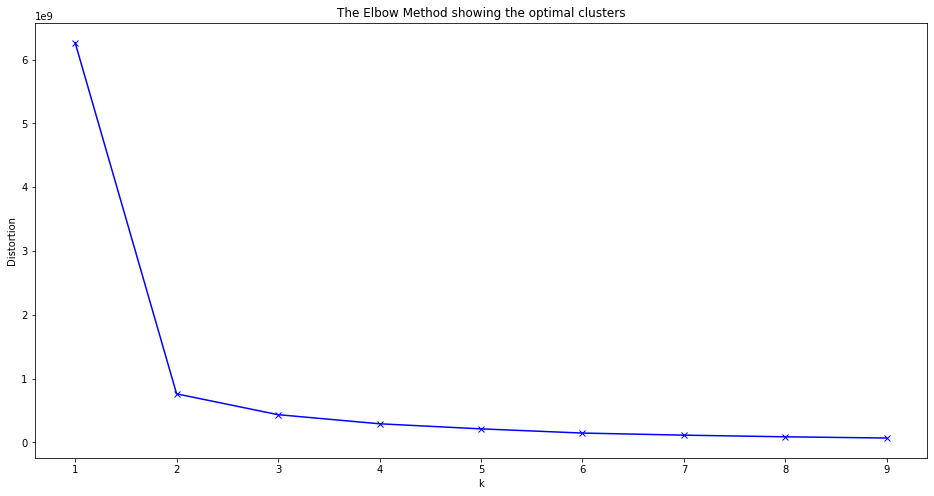

In [182]:
# Collecting the distortions into list
distortions = []
K = range(1,10)
for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(df_data)
 distortions.append(kmeanModel.inertia_)

# Plotting the distortions
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal clusters')
plt.show()

We can deduce that the “elbow” is the number 3 (optimal cluster).

In [184]:
kmeans_model = KMeans(n_clusters=3, random_state=32932)
# Fit into our dataset fit
kmeans_predict = kmeans_model.fit_predict(df_data)

In [185]:
df_data['Cluster'] = kmeans_predict

In [187]:
df_data

,Jumlah,Harga_Satuan,x0_0,x0_1,x0_2,x0_3,x0_4,x0_5,x0_6,x0_7,...,x0_27,x0_28,x0_29,x0_30,x0_31,x0_32,x0_33,x0_34,x0_35,Cluster
0,6.0,2.55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
1,6.0,3.39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
2,6.0,3.39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,6.0,3.39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,2.0,7.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360835,4.0,3.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
360836,4.0,3.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
360837,12.0,1.95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
360838,12.0,0.85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [189]:
print(distortions)

[6265640379.112533, 759662095.8078496, 433146910.30788517, 290389927.72383523, 210690925.75989136, 144892793.02774835, 112058556.19965582, 86345815.85437341, 66880237.493522026]


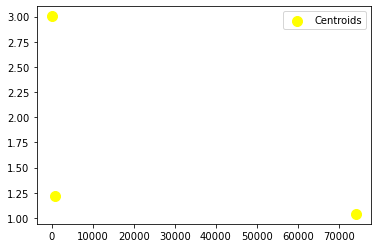

In [198]:
# Visualising the clusters
#plt.scatter(df_data_new[kmeans_predict == 0, 0], df_data_new[kmeans_predict == 0, 1], s = 1, c = 'red', label = 'Group 1')
#plt.scatter(df_data[kmeans_predict == 1, 0], df_data[kmeans_predict == 1, 1], s = 1, c = 'blue', label = 'Group 2')
#plt.scatter(df_data[kmeans_predict == 2, 0], df_data[kmeans_predict == 2, 1], s = 1, c = 'green', label = 'Group 3')
# Plotting the centroids of the clusters
plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()

In [199]:
df_all = df.join(df_data['Cluster'])

In [200]:
df_all.to_csv('final_data.csv', index = False)

In [207]:
df_all.groupby('Cluster').count()

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
Cluster,,,,,,,,
0,360117,360117,360117,360117,360117,360117,360117,360117
1,1,1,1,1,1,1,1,1
2,722,722,722,722,722,722,722,722
